In [31]:
import sys

print(sys.version)

3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]


In [32]:
pip install "C:\Users\footb\Downloads\SpecUtils-0.0.1-cp310-cp310-win_amd64.whl"

Processing c:\users\footb\downloads\specutils-0.0.1-cp310-cp310-win_amd64.whl
SpecUtils is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


*Getting the specutils package and the synthetic spectra*


Counts per second in each channel: [5.624e+03 5.550e+03 5.591e+03 ... 2.000e+00 0.000e+00 2.000e+00]
# of channels: 4096


C:\Users\footb\AppData\Local\Temp\ipykernel_1056\441361725.py:162: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


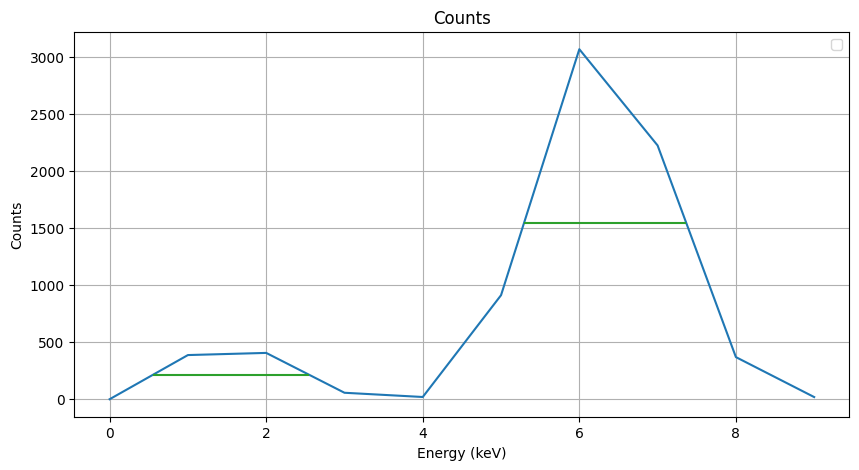

5.904255319148959 %  this is the percent abundance of 240(real)
94.09574468085104 %  this is the percent abundance of 239(real)


In [35]:
### Example script for reading files with SpecUtils
### Created 02/11/2025

import SpecUtils
import numpy as np
import matplotlib.pyplot as plt
from typing import Any

##############

def load_spectra(path_to_spectra: str) -> SpecUtils.SpecFile:
    """
    Loads spectrum file automatically for a given file type.
    SpecUtils.ParserType.Auto will try to automatically determine
    the file extension, so verify you are loading a compatible file"""
    
    spec_file = SpecUtils.SpecFile()
    try:
        spec_file.loadFile(path_to_spectra, SpecUtils.ParserType.Auto)
        return spec_file
    
    except RuntimeError as e:
        raise Exception(f"Failed to decode file: {e}")
        
    return

def parse_title(spectrum_title: str) -> dict[str, Any]:
    """
    Parses all the information in my (Tanner's) .pcf file titles
    and loads it into a dictionary.
    
    A few notes:
        1. There is a bit of information here not useful for the
           arm control information barriers project but is here
           because of another project. You will not need things like
           nps, U235 content, etc.
        2. Pu239, Pu240, and other isotopics are weight fractions
           are represented as NEGATIVE NUMBERS and you might want to
           switch them back to positive.
        3. det_max_erg is in MeV, but its more common to use keV.
        4. PuRatio is just the ratio of Pu240/Pu239 and is positive
           already since, yknow, negative divided by a negative.
        5. NPS is a relic. Ignore, as it makes no sense in this context.
        6. Titles are unique to the person/software that generated the 
           spectrum. If/when you use another detector or input a spectrum 
           I did not provide, the title will be different and this function 
           will not work.
    
    Args:
        spectrum_title: spectrum title as string
    
    Returns:
        Dictionary containing what the spectrum represents
    """
    
    snm, U232, U235, U238, Pu239, Pu240, Pu241, PuRatio, age, snmir, snmor, \
    U_mass, Pu_mass, shd_mat, shdor, det_type, det_dist, det_bins, det_max_erg, \
    nps = spectrum_title.split("_")
    
    return {"snm":	snm, "U232": float(U232), "U235": float(U235), "U238": float(U238), "Pu239": float(Pu239), 
            "Pu240": float(Pu240), "Pu241": float(Pu241), "PuRatio": float(PuRatio), "age": int(age), 
            "snmir": float(snmir), "snmor": float(snmor), "U_mass": float(U_mass), "Pu_mass": float(Pu_mass), 
            "shd_mat": shd_mat, "shdor": float(shdor), "det_type": det_type, "det_dist": float(det_dist),
            "det_bins": int(det_bins), "det_max_erg": float(det_max_erg), "nps": nps }
    
##############

def main():
    
    '''
    Below is an example of opening a .PCF file which contains 350 spectra,
    finding a single WGPu spectrum, converting the counts to CPS, and printing
    CPS in each bin/channel
    
    ********
    WARNING! Because of a hiccup in my simulations on my other project, there
    are 4097 bins in each spectrum when you should only use 4096. For context,
    this happened because I needed to match my GADRAS-DRF and MCNP simulations.
    
    You MUST make sure you remove the last channel whenever you grab counts! 
    
    Example:
    
    >>> counts_per_bin = [0, 1, ..., 20, 3]
    >>> counts_per_bin_except_last = counts_per_bin[:-1]
    >>> counts_per bin_except_last
    >>>
    >>> [0, 1, ..., 20]
    '''
    
    ### Define a few constants (just an example, choose what you want/need)
    isWGPu_threshold = 0.06
    deadtime_frac_threshold = 0.05
    
    ### Load spectra
    ##CHANGE THE THING BASED ON THE FILE
    pcf_file = r"C:\Users\footb\OneDrive\Documents\Python Scripts\Synthetic Spectra\Synthetic Spectra\Pu_Steel4.5cm_Det60cm_HPGe_outps\Pu_Steel4.5cm_Det60cm_HPGe_CPS_tally48.pcf"
    spectra = load_spectra(pcf_file)
    #C:\Users\footb\OneDrive\Documents\Python Scripts\Synthetic Spectra\Synthetic Spectra\Pu_Steel4.5cm_Det60cm_HPGe_outps\Pu_Steel4.5cm_Det60cm_HPGe_CPS_tally48.pcf
    #C:\Users\footb\OneDrive\Documents\Python Scripts\Synthetic Spectra\Synthetic Spectra\Pu_Lead0.7cm_Det100cm_HPGe_outps\Pu_Lead0.7cm_Det100cm_HPGe_CPS_tally18.pcf
    #C:\Users\footb\OneDrive\Documents\Python Scripts\Synthetic Spectra\Synthetic Spectra\Pu_Steel3.5cm_Det60cm_HPGe_outps\Pu_Steel3.5cm_Det60cm_HPGe_CPS_tally8.pcf
    #C:\Users\footb\OneDrive\Documents\Python Scripts\Synthetic Spectra\Synthetic Spectra\Pu_HDPE4.0cm_Det100cm_HPGe_outps\Pu_HDPE4.0cm_Det100cm_HPGe_CPS_tally18.pcf
    #C:\Users\footb\OneDrive\Documents\Python Scripts\Synthetic Spectra\Synthetic Spectra\Pu_Steel7.5cm_Det60cm_HPGe_outps\Pu_Steel7.5cm_Det60cm_HPGe_CPS_tally18.pcf
    ### Find the first WGPu spectrum with acceptable dead time
    for i in range(spectra.numMeasurements()):

        spectrum = spectra.measurement(i)        # Get single measurement i.e., spectrum
        info = parse_title(spectrum.title())     # Get info from the title
        livetime = spectrum.liveTime()           # Get live time
        realtime = spectrum.realTime()           # Get real time
        deadtime_frac = (1-livetime/realtime)    # E.g., if live 10 secs but real 100 secs, deadtime frac = 90%
        
        # WGPu found with low enough dead time
        if info["PuRatio"] <= isWGPu_threshold and deadtime_frac <= deadtime_frac_threshold:

            energies = np.array(spectrum.channelEnergies()[:-2])
            counts = spectrum.gammaCounts()[:-1] # Remove last bin for reasons above!
            counts = np.array(counts)            # Convert to np.array for quick array manipulation
            cps = counts                # Convert to counts per second
            print(f"Counts per second in each channel: {cps}")
            print(f"# of channels: {len(cps)}")

             # **Focus on Channels < 1000**
            channels = np.arange(len(cps))  # Create full channel array
            mask = (energies >= 600) & (energies <= 700)  # Mask for range 600-800
            filtered_channels = channels[mask]
            filtered_counts  = counts [mask]
            filtered_energy = energies[mask]

            # **Plot Filtered CPS vs. Channel**
            x_min, x_max = min(filtered_energy), max(filtered_energy)
            num_ticks = 10 # Increase for more tick marks
            xticks = np.linspace(x_min, x_max, num_ticks)  # Generate evenly spaced x-ticks

            
            plt.figure(figsize=(10, 5))
            #plt.plot(filtered_energy, filtered_counts, label="Counts", color="blue")
            filtered_counts[55]=filtered_counts[58]
            filtered_counts[56]=filtered_counts[57]
            b=filtered_counts[55]
            m=((filtered_counts[64]-filtered_counts[55])/(8))
            #linfit=[0,0,0,0,0,0,0,0,0,0]
            x=0
            for i in range(55,65,1):
                
                filtered_counts[i]=filtered_counts[i]-((m*x)+b)
                x=x+1
                #print(x)
            plt.plot(filtered_counts[55:65])
        
            
            w=find_peaks(filtered_counts[55:65])
            

            a=peak_widths(filtered_counts[55:65], w[0], rel_height=0.5)
            
            #fwhm(filtered_counts[55:65])
            #print(filtered_energy[57],filtered_energy[62],filtered_counts)
            #plt.plot(filtered_energy[56], filtered_counts[56], "x")
            #plt.plot(filtered_energy[61], filtered_counts[61], "x")
            #plt.xticks(xticks)  # Apply custom x-ticks
            plt.legend()
            plt.grid(True)
            plt.hlines(*a[1:], color="C2")
            plt.xlabel("Energy (keV)")
            plt.ylabel("Counts")
            plt.title("Counts")
            plt.show()
            alfred=info["PuRatio"]*100
            batman=100-alfred
            print(alfred,'%  this is the percent abundance of 240(real)')
            print(batman,'%  this is the percent abundance of 239(real)')
            return filtered_counts
            break                                # End loop
    
    
    
    return
    
if __name__ == "__main__":
    main()


*Determining peak shape*

In [36]:
import math
import numpy as np



#Tailing amplitude function
#x is channel
#A and C are tailing amplitude parameters
#B and D are parameters that describe two tailing slopes
#deel is del which reduces T to zero at the peak position
def bigT(channelw,xi,xo,deel=1, A=1, B=1, C=1, D=1):
    x=(xi-xo)/channelw
    T=(deel*(A*math.exp(B*x)+C*math.exp(D*x))*(1-math.exp(0.4*(x**2))))
    return T

#Net counts in a channel function
#Yi is the net counts output
#Yo is the peak height at the peak position
#a is alpha or the peak width parameter
#bigT calls the tailing amplitiude fucntion 
def netCounts( Yo, a, xi, xo, channelw):

    Yi = Yo*(math.exp(a*(((xi-xo))**2))+bigT(channelw,xi,xo))
    return Yi

#sigtsq is the total peak width at half maximum squared
#noise is the contributions due to detector noise


def alpha(sigtsq):
    a=(-.5)*(sigtsq)
    return a

def sigmat(noise,sigs,E):
    sigtq=(noise)+(sigs*E)
    return sigtq

#intrinsic efficiency
#area of the peak function
#Xk is decays per second

def IntrinsicEfficiencypeakarea(isotope, Xk, AM=0.00585, PuM=100.0, b=1,c=1):
    Bj, Ej, eff, mewjA, mewjPu =summation(isotope)
    Aj=(((Bj*Xk)*math.exp(-mewjA*AM))*((1/(mewjPu))*(1-math.exp(-mewjPu*PuM)))*(eff*(1+b*Ej+c*(Ej**2))))

    return Aj, Bj

def summation(j=239):

    mewjA=8.04*10**-2
    mewjPu=.137

    if j == 239 or j== 645.969:
        Bj=1.489*10**-7
        Ej=645.969 #keV
        eff=1
        T=24119
        return Bj,Ej, eff, mewjA,mewjPu,T
    if j == 240 or j == 642.500:
        Bj=1.26*10**-7
        Ej=642.500 #keV
        eff=1
        T=6564
        return Bj,Ej,eff, mewjA,mewjPu,T
    
# A/B = I1/I2 * E1/E2 * P1/P2 * tA/tB


#a=aj, b=bj
def Ayob(A1,B1,A2,B2,T1,T2):

    AoB= ((A1)/(A2))*((B2)/(B1))*((T1)/(T2))
    AoB=100*((AoB)/(AoB+1))
    return AoB

*Calculation Methods and Equations*

Counts per second in each channel: [5.624e+03 5.550e+03 5.591e+03 ... 2.000e+00 0.000e+00 2.000e+00]
# of channels: 4096


C:\Users\footb\AppData\Local\Temp\ipykernel_1056\441361725.py:162: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


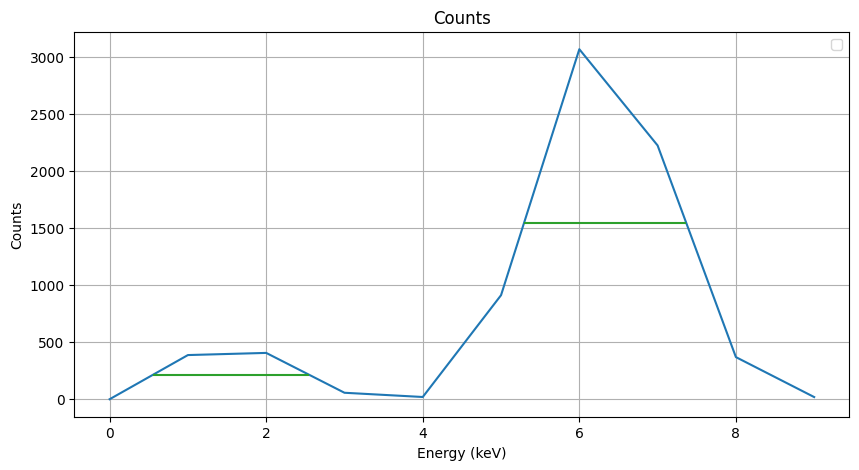

5.904255319148959 %  this is the percent abundance of 240(real)
94.09574468085104 %  this is the percent abundance of 239(real)
this is parameters [561.70698778   1.56600777  -0.913145   -99.31883631]
(array([2, 6]), {}) (array([2.00357251, 2.07414177]), array([ 212.625 , 1542.5625]), array([0.54959612, 5.29291142]), array([2.55316864, 7.36705319]))
213.74138346557953 this the integrated counts of 239
(array([2, 6]), {}) (array([2.00357251, 2.07414177]), array([ 212.625 , 1542.5625]), array([0.54959612, 5.29291142]), array([2.55316864, 7.36705319]))
42.997018501896704 this the integrated counts of 240
this is the percent abundance of 239: 93.92344850007272 %


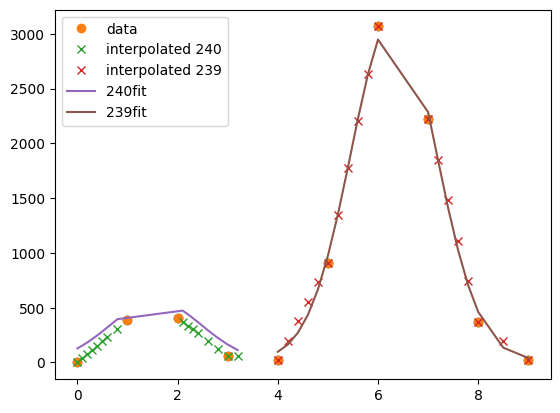

In [37]:
from scipy.integrate import quad
from scipy.integrate import trapezoid

#take total peak width at half maximum (FWHM)
#get peak width parameter= a

#xi is center of peak, xo is left side of peak
#take desired channel = xi, peak height at the apex = y0,x0 = channel in the apex of the peak, peak width parameter =a 
#get net counts in channel=yi

#take desired isotope or peak, mass of absorber, decays per second, mass of plutonoium
#get area of peak and branching ratio

#take branching ratio and area of peak and net counts
#get ratio from net counts and area of peak


#array is channel energies
#dps is counts per second
#value is the desired energy of the peak
#spread is how many data pionts you want to looks

def peakPoints(array , dps , value, spread=2):

    #Returns the index of the peak nearest to the given value
                
    array = np.asarray(array)
                
    idx = (np.abs(array - value)).argmin()

    energyPoints = np.linspace(idx-spread , idx + spread , 2 * spread + 1)

    curve = np.polyfit(array[int(energyPoints[0]):int(energyPoints[len(energyPoints)-1])] , dps[int(energyPoints[0]):int(energyPoints[len(energyPoints)-1])] , 4)
                
    return energyPoints , curve

def mainmain():

    L=[239,240]
    
    Awns=[0,0,0,0,0,0,0]
    x=main()
    import numpy as np 
    import matplotlib.pyplot as plt 
    from scipy.optimize import curve_fit 


    # Recast xdata and ydata into numpy arrays so we can use their handy features 

    plt.plot(x[55:65], 'o') 
    
    # Define the Gaussian function
    ta=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,2.1,2.2,2.3,2.4,2.6,2.8,3,3.2]
    tb=[4,4.2,4.4,4.6,4.8,5,5.2,5.4,5.6,5.8,6,7,7.2,7.4,7.6,7.8,8,8.5,9]
    ta=np.asarray(ta)
    tb=np.asarray(tb)
    def Gauss(x, a, b,c,offset): 
        return a * np.exp(-0.5 * np.power((x-b) / c, 2.0)) + offset 
        
    
    xinterp240=np.interp(ta,[0,1,2,3],x[55:59])
    a = max(ta)
    b = max((ta) - min(ta)) / 2.0 + min(ta)
    c = 1.0 # my guess from the equation
    offset = min(xinterp240)
    initialParameters = np.array([a, b, c, offset])
    parameters,covariance = curve_fit(Gauss, ta, xinterp240,initialParameters) 

    fit_A = parameters[0] 
    fit_B = parameters[1] 
    fit_c =parameters[2]
    print('this is parameters',parameters)
    fit_y1 = Gauss(ta, fit_A, fit_B,fit_c,offset) 

    xinterp239=np.interp(tb,[4,5,6,7,8,9],x[59:65])
    a = max(tb)
    b = max((tb) - min(tb)) / 2.0 + min(tb)
    c = 1.0 # my guess from the equation
    offset = min(xinterp239)
    initialParameters = np.array([a, b, c, offset])
    parameters,covariance = curve_fit(Gauss, tb, xinterp239,initialParameters) 

    fit_A = parameters[0] 
    fit_B = parameters[1] 
    fit_c =parameters[2]

    fit_y2 = Gauss(tb, fit_A, fit_B,fit_c,offset) 
    
    plt.plot(x[55:65], 'o', label='data') 
    plt.plot(ta,xinterp240,'x',label='interpolated 240')
    plt.plot(tb,xinterp239,'x',label='interpolated 239')
    plt.plot(ta,fit_y1, '-', label='240fit') 
    plt.plot(tb,fit_y2,'-', label='239fit')
    plt.legend()


    #w=find_peaks(x[55:65])
    #a=peak_widths(x[55:65], w[0], rel_height=0.5)
    for isotope in L:
        #x is the file
        Bj, Ej, eff, mewjA, mewjPu,T = summation(isotope)
        
        
        #Yo is peak height at peak position xo
        channelw=0.73217773
        #xo is the peak position of where the FWHM intersects with the counts graph
        #Tis the halflife in years

        w=find_peaks(x[55:65])
        a=peak_widths(x[55:65], w[0], rel_height=0.5)
        print(w,a)
        if isotope ==239:
            

            xo=a[2][1]
            Yo=np.interp(xo,[0,1,2,3,4,5,6,7,8,9],x[55:65])
            #Yi= netCounts(Yo, a[0][1], w[0][1], xo, channelw)
            Yi=trapezoid(fit_y2,None,0.01)
            Awns[0]=Yi
            print(Yi,'this the integrated counts of 239')
            Awns[1]=Bj
            Awns[4]=T
        if isotope ==240:
            xo=a[2][0]
            Yo=np.interp(xo,[0,1,2,3,4,5,6,7,8,9],x[55:65])
          

            #Yi= netCounts(Yo, a[0][0], w[0][0],xo, channelw)
            Yi=trapezoid(fit_y1,None,0.01)
            Awns[2]=Yi
            print(Yi,'this the integrated counts of 240')
            Awns[3]=Bj
            Awns[5]=T
    Awns[6]=Ayob(Awns[0],Awns[1],Awns[2],Awns[3],Awns[4],Awns[5])
    
    print('this is the percent abundance of 239:',Awns[6],'%')

mainmain()

        
